In [1]:
import os
from glob import glob
import xarray as xr

In [2]:
data_info = dict(
    ctrl=dict(
        casename='g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005',
        histpath='/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/SMYLE-FOSI/ocn/hist',
    ),
    clone=dict(
        casename='g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.clone',
        histpath='/glade/scratch/mclong/archive/g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.clone/ocn/hist',
    )
)

dsets = {}
for key, info in data_info.items():
    files = sorted(glob(f"{info['histpath']}/{info['casename']}.pop.h.0347-??.nc"))
    if len(files) == 12:
        files = files[:6]
    assert len(files) == 6
    dsets[key] = xr.open_mfdataset(files, compat='override', combine='by_coords', coords='minimal').compute()

In [6]:
xr.testing.assert_equal(dsets['ctrl'].FG_CO2, dsets['clone'].FG_CO2)

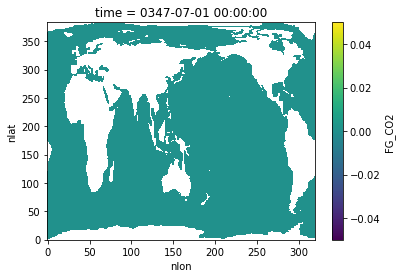

In [4]:
(dsets['ctrl'].FG_CO2.isel(time=-1) - dsets['clone'].FG_CO2.isel(time=-1)).plot()

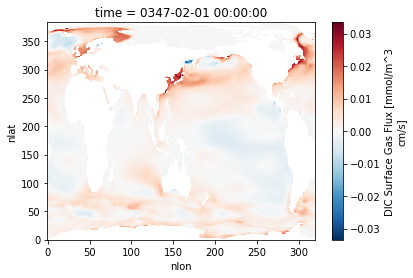

In [5]:
dsets['ctrl'].FG_CO2.isel(time=0).plot()